In [2]:
#Step 1: Load Dataset
import pandas as pd

# Load dataset
df = pd.read_csv("loan_data.csv")

# Strip extra spaces in column names
df.columns = df.columns.str.strip()

# Quick look at data
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

In [3]:
# Step 2: Handle Missing Values
# Numeric columns
numeric_cols = ['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Categorical columns
categorical_cols = ['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Verify missing values
print(df.isnull().sum())


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [4]:
# Step 3: Encode Categorical Variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df_encoded.head())


   person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0        22.0        71948.0               0    35000.0          16.02   
1        21.0        12282.0               0     1000.0          11.14   
2        25.0        12438.0               3     5500.0          12.87   
3        23.0        79753.0               0    35000.0          15.23   
4        24.0        66135.0               1    35000.0          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0                 0.49                         3.0           561            1   
1                 0.08                         2.0           504            0   
2                 0.44                         3.0           635            1   
3                 0.44                         2.0           675            1   
4                 0.53                         4.0           586            1   

   person_gender_male  ...  person_education_Master  \
0            

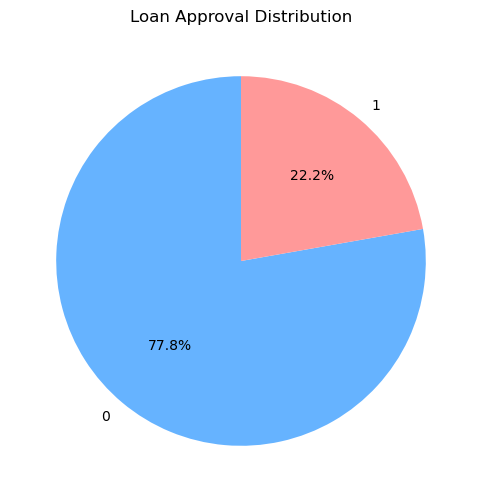

Insight: This chart shows the proportion of approved vs rejected loans. You can quickly see which outcome dominates.


In [9]:
# Step 4: Exploratory Data Analysis (EDA)
# 1. Loan Status Distribution
import matplotlib.pyplot as plt

# Pie chart for loan status
loan_counts = df['loan_status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Loan Approval Distribution")
plt.show()

# Insight
print("Insight: This chart shows the proportion of approved vs rejected loans. You can quickly see which outcome dominates.")


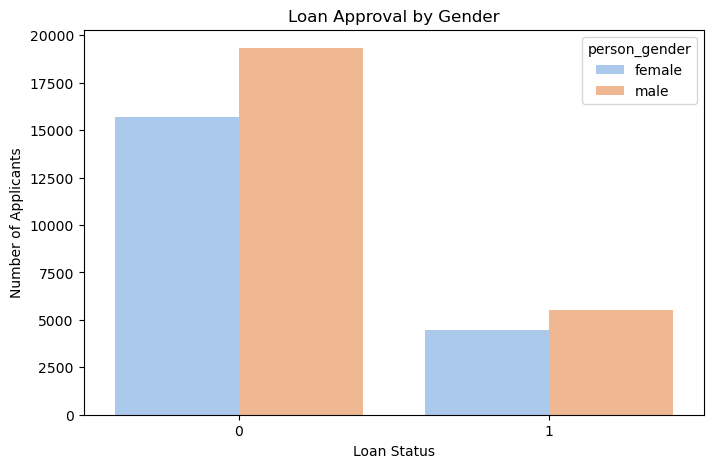

Insight: This chart shows how loan approvals vary by gender. You can compare approval rates between male and female applicants.


In [10]:
# 2. Loan Approval by Gender
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='loan_status', hue='person_gender', data=df, palette='pastel')
plt.title("Loan Approval by Gender")
plt.xlabel("Loan Status")
plt.ylabel("Number of Applicants")
plt.show()

# Insight
print("Insight: This chart shows how loan approvals vary by gender. You can compare approval rates between male and female applicants.")


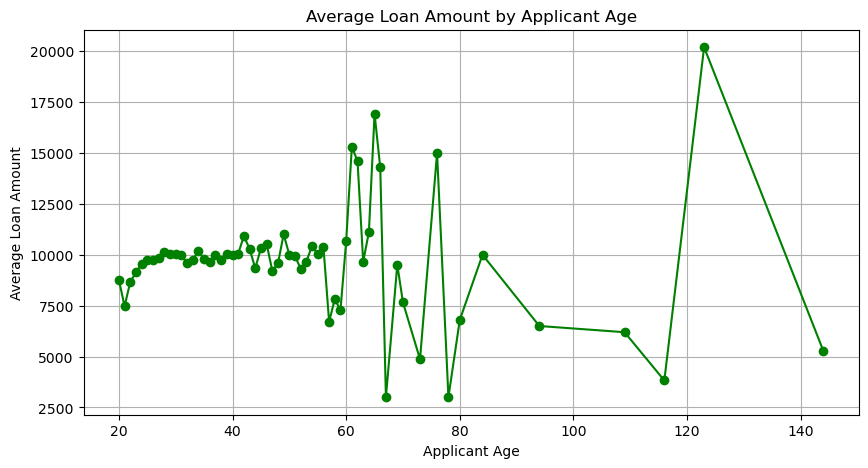

Insight: This line chart shows trends in loan amounts across different ages. You can see which age groups take higher loans.


In [11]:
# 3. Average Loan Amount by Age
avg_loan_by_age = df.groupby('person_age')['loan_amnt'].mean().reset_index()
plt.figure(figsize=(10,5))
plt.plot(avg_loan_by_age['person_age'], avg_loan_by_age['loan_amnt'], marker='o', linestyle='-', color='green')
plt.title("Average Loan Amount by Applicant Age")
plt.xlabel("Applicant Age")
plt.ylabel("Average Loan Amount")
plt.grid(True)
plt.show()

# Insight
print("Insight: This line chart shows trends in loan amounts across different ages. You can see which age groups take higher loans.")


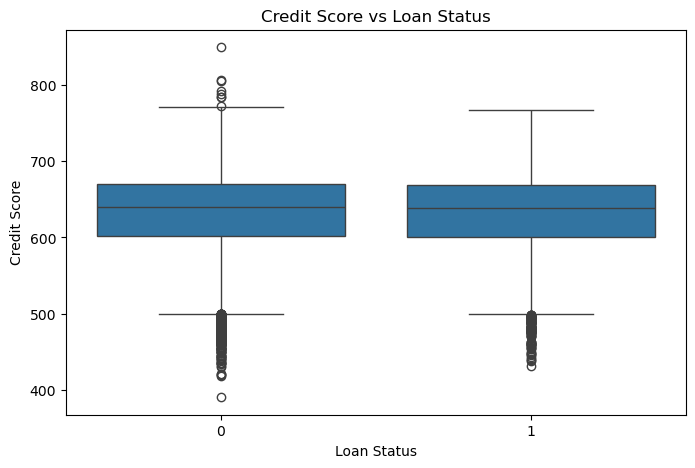

Insight: The boxplot shows the distribution of credit scores for approved and rejected loans. Higher scores are associated with approvals.


In [14]:
# 4. Credit Score vs Loan Status
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='credit_score', data=df)  # Removed palette
plt.title("Credit Score vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Credit Score")
plt.show()

# Insight
print("Insight: The boxplot shows the distribution of credit scores for approved and rejected loans. Higher scores are associated with approvals.")
